In [1]:
import json
from tqdm import tqdm

In [2]:
predictions_list = []
for i in tqdm(range(1,112)):
    results_index_path = f"../Data/faiss/results/results_paper_{i}.json"
    with open(results_index_path, 'rb') as f:
        paper_result = json.load(f)
    predictions_list.append(paper_result)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:01<00:00, 96.53it/s]


In [3]:
predictions_list[1]

{'MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}}

In [4]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('../Result/Excel/Standard_Criteria_Binary.xlsx', engine='openpyxl')
# Replace column names with corrected names
df.columns = df.columns.str.replace('_x0002_', ' ')

df = df[['MOF contained', 'True Water Stability', 'Reference #']]
df = df.rename(columns={'MOF contained': 'MOF name', 'True Water Stability': 'Ground-truth Stability',
                      'Reference #': 'Paper id'})

# ground_truth_dict = df.to_dict('index')
# ground_truth_dict = {f'MOF {k+1}': v for k, v in ground_truth_dict.items()}

# for mof in stability_dict.values():
#     mof['Predicted Stability'] = 'Not provided'
    
# df

In [5]:
ground_truth_list = []
for _, group in df.groupby("Paper id"):
    mofs = {
        row["MOF name"]: {
            "Ground-truth Stability": row["Ground-truth Stability"],
            "Paper id": str(row["Paper id"])
        }
        for _, row in group.iterrows()
    }
    ground_truth_list.append(mofs)

In [6]:
def merge_dicts(dict1, dict2):
    merged = dict1.copy()
    for key, value in dict2.items():
        if isinstance(value, dict) and key in merged and isinstance(merged[key], dict):
            merged[key] = merge_dicts(merged[key], value)
        else:
            merged[key] = value
    return merged

In [7]:
# merge_dicts(ground_truth_list[0],predictions_list[0])

In [24]:
predictions_list[1]

{'MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}}

In [25]:
ground_truth_list[1]

{'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'},
 'ZIF-8': {'Ground-truth Stability': 'Stable', 'Paper id': '2'},
 'MIL-53(Al)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'},
 'HKUST-1': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
 'Zn-MOF-74': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
 'MIL-110(Al)': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
 'MOF-5': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
 'MOF-508': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
 'MOF-69C': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}}

In [12]:
matched_keys

['Bio-MOF-14', 'Bio-MOF-13', 'Bio-MOF-12', 'Bio-MOF-11']

In [32]:

# def combine_dictionaries(dict_1, dict_2, threshold=80):
#     combined_dict = {}

#     for key_1, value_1 in dict_1.items():
#         matched_key = None
#         highest_similarity = 0

#         for key_2 in dict_2.keys():
#             similarity = fuzz.token_sort_ratio(key_1, key_2)
#             if similarity > threshold and similarity > highest_similarity:
#                 matched_key = key_2
#                 highest_similarity = similarity

#         if matched_key is not None:
#             combined_dict[key_1] = {**value_1, **dict_2[matched_key]}

#     return combined_dict

from fuzzywuzzy import fuzz

def match_MOF_names(prediction_dict, ground_truth_dict, threshold=80):
    """
    Match MOF names between prediction and ground truth dictionaries based on similarity.

    This function takes two dictionaries, prediction_dict and ground_truth_dict,
    where the keys represent MOF names and the values are dictionaries containing
    information related to the MOFs. It uses fuzzy matching to find matching pairs
    of MOF names between the two dictionaries based on similarity.

    Parameters:
        prediction_dict (dict): A dictionary containing predicted MOF data.
        ground_truth_dict (dict): A dictionary containing ground truth MOF data.
        threshold (int, optional): The minimum similarity score required to consider
            two keys as a match. The default threshold is 80.

    Returns:
        tuple: A tuple containing two elements:
            - A dictionary (combined_dict) that contains the combined information of
              the matched MOFs between prediction_dict and ground_truth_dict.
            - A list (matched_pairs) that contains tuples of matched key pairs from
              prediction_dict and ground_truth_dict.
    """

    combined_dict = {}
    matched_pairs = []

    for key_1, value_1 in prediction_dict.items():
        matched_key = None
        highest_similarity = 0

        for key_2 in ground_truth_dict.keys():
            similarity = fuzz.token_sort_ratio(key_1, key_2)
            if similarity > threshold and similarity > highest_similarity:
                matched_key = key_2
                highest_similarity = similarity

        if matched_key is not None:
            combined_dict[key_1] = {**value_1, **ground_truth_dict[matched_key]}
            matched_pairs.append((key_1, matched_key))

    return combined_dict, matched_pairs

In [34]:
# Sample test data
ground_truth_dict = {
'Bio-MOF-14': {'Ground-truth Stability': 'Stable', 'Paper id': '1'},
'Bio-MOF-13': {'Ground-truth Stability': 'Stable', 'Paper id': '1'},
'Bio-MOF-12': {'Ground-truth Stability': 'Unstable', 'Paper id': '1'},
'Bio-MOF-11': {'Ground-truth Stability': 'Unstable', 'Paper id': '1'},
'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'},
'ZIF-8': {'Ground-truth Stability': 'Stable', 'Paper id': '2'},
'MIL-53(Al)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'},
'HKUST-1': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
'Zn-MOF-74': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
'MIL-110(Al)': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
'MOF-5': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
'MOF-508': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'},
'MOF-69C': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}
}

prediction_dict = {
    'bio-MOF-11': {'Predicted Stability': 'Unstable', 'Paper id': '1'},
    'bio-MOF-12': {'Predicted Stability': 'Stable', 'Paper id': '1'},
    'MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'},
    'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'},
    'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'},
    'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'},
    'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'},
    'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}
}

dict1 = predictions_list[1]
dict2 = ground_truth_list[1]
combined_dict = match_MOF_names(prediction_dict, ground_truth_dict, threshold=70)
combined_dict

({'bio-MOF-11': {'Predicted Stability': 'Unstable',
   'Paper id': '1',
   'Ground-truth Stability': 'Unstable'},
  'bio-MOF-12': {'Predicted Stability': 'Stable',
   'Paper id': '1',
   'Ground-truth Stability': 'Unstable'},
  'MOF-74': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'MOF-508b': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'HKUST-1': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'Cr-MIL-101': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Stable'},
  'Al-MIL-110': {'Predicted Stability': 'Not provided',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'}},
 [('bio-MOF-11', 'Bio-MOF-11'),
  ('bio-MOF-12', 'Bio-MOF-12'),
  ('MOF-74', 'Zn-MOF-74'),
  ('MOF-508b', 'MOF-508'),
  ('HKUST-1', 'HKUST-1'),
  ('Cr-MIL-101', 'MIL-101(Cr)'),
  ('Al-MIL-110', 'MIL-110(Al)')])

In [91]:
g_test = json.dumps(ground_truth_list[0])

In [93]:
p_test = json.dumps(predictions_list[0])

In [ ]:
from langchain.evaluation.qa import QAGenerateChain

In [95]:
from langchain.docstore.document import Document
new_sting = '\n'.join([g_test, p_test])
doc =  Document(page_content=new_sting, metadata={"source": "local"})

In [104]:
from langchain.indexes import VectorstoreIndexCreator
from langchain.vectorstores import DocArrayInMemorySearch

index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
).from_documents([doc])

C:\Users\mehra\anaconda3\envs\elm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [120]:
doc

Document(page_content='{"Bio-MOF-14": {"Ground-truth Stability": "Stable", "Paper id": "1"}, "Bio-MOF-13": {"Ground-truth Stability": "Stable", "Paper id": "1"}, "Bio-MOF-12": {"Ground-truth Stability": "Unstable", "Paper id": "1"}, "Bio-MOF-11": {"Ground-truth Stability": "Unstable", "Paper id": "1"}}\n{"MOF-11": {"Predicted Stability": "Unstable", "Paper id": "1"}, "MOF-12": {"Predicted Stability": "Unstable", "Paper id": "1"}, "MOF-13": {"Predicted Stability": "Unstable", "Paper id": "1"}, "MOF-14": {"Predicted Stability": "Stable", "Paper id": "1"}}', metadata={'source': 'local'})

In [105]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA

llm = ChatOpenAI(temperature = 0.0)
qa = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=index.vectorstore.as_retriever(), 
    verbose=True,
    chain_type_kwargs = {
        "document_separator": "<<<<>>>>>"
    }
)

In [130]:
examples = [
    {
        "query": "According to the document, do Bio-MOF 1 and MOF 1 represent the same material?",
        "answer": "Yes"
    },
    {
        "query": "Do  MIL-101\n-NH2(Cr) and MIL-101-NH2 represent the same material?",
        "answer": "Yes"
    }
]

In [131]:
from langchain.evaluation.qa import QAGenerateChain
example_gen_chain = QAGenerateChain.from_llm(ChatOpenAI())

In [132]:
new_examples = example_gen_chain.apply_and_parse(
    [{"doc": doc}]
)

In [133]:
new_examples

[{'query': 'What is the ground-truth stability of Bio-MOF-11?',
  'answer': 'The ground-truth stability of Bio-MOF-11 is Unstable.'}]

In [134]:
qa.run(examples[0]["query"])



> Entering new  chain...

> Finished chain.


'Based on the given information, we cannot determine if Bio-MOF 1 and MOF 1 represent the same material. The document does not provide any information about the relationship between Bio-MOF 1 and MOF 1.'

In [125]:
predictions = qa.apply(examples)



> Entering new  chain...

> Finished chain.


> Entering new  chain...

> Finished chain.


In [126]:
predictions

[{'query': 'Do {Bio-MOF 1} and {MOF 1} represent the same material?',
  'answer': 'Yes, if they look similar',
  'result': 'Yes, {Bio-MOF 1} and {MOF 1} represent the same material.'},
 {'query': 'Do  {MIL-101\n-NH2(Cr)} and {MIL-101-NH2} represent the same material?',
  'answer': 'Yes, , if they look similar',
  'result': 'Based on the given context, there is no information available about {MIL-101-NH2(Cr)} or {MIL-101-NH2}. Therefore, it is not possible to determine if they represent the same material or not.'}]

In [16]:
not_provided_count = 0

for key in predictions_dict:
    if predictions_dict[key].get('Predicted Stability') == 'Not provided':
        not_provided_count += 1

print(not_provided_count)

132


In [39]:
stability_dict

{'MOF 1': {'MOF name': 'Bio-MOF-14',
  'Ground-truth Stability': 'Stable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 2': {'MOF name': 'Bio-MOF-13',
  'Ground-truth Stability': 'Stable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 3': {'MOF name': 'Bio-MOF-12',
  'Ground-truth Stability': 'Unstable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 4': {'MOF name': 'Bio-MOF-11',
  'Ground-truth Stability': 'Unstable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 5': {'MOF name': 'MIL-101(Cr)',
  'Ground-truth Stability': 'Stable',
  'Paper id': 2,
  'Predicted Stability': 'Stable'},
 'MOF 6': {'MOF name': 'ZIF-8',
  'Ground-truth Stability': 'Stable',
  'Paper id': 2,
  'Predicted Stability': 'Not provided'},
 'MOF 7': {'MOF name': 'MIL-53(Al)',
  'Ground-truth Stability': 'Stable',
  'Paper id': 2,
  'Predicted Stability': 'Unstable'},
 'MOF 8': {'MOF name': 'HKUST-1',
  'Ground-truth Stability': 'Unstable'

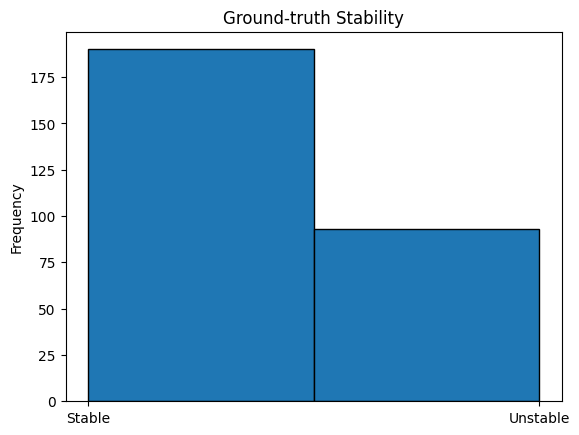

In [18]:
import matplotlib.pyplot as plt

# Extract Ground-truth Stability values
stability_values = [entry['Ground-truth Stability'] for entry in stability_dict.values()]

# Create histogram
plt.hist(stability_values, bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Ground-truth Stability')
plt.show()

In [8]:
# def merge_dictionaries(ground_truth_dict, predictions_dict):
#     # Convert dictionaries to dataframes and set 'MOF name' as index
#     df1 = pd.DataFrame(ground_truth_dict).T.set_index('MOF name')
#     df2 = pd.DataFrame(predictions_dict).T.set_index('MOF name')

#     # Merge dataframes
#     merged_df = df1.join(df2)

#     # Reset index and map index back to original dictionary keys
#     merged_df.reset_index(inplace=True)
#     merged_df.index = [f'MOF {i+1}' for i in range(len(merged_df))]

#     # Convert back to nested dictionary
#     merged_dict = merged_df.T.to_dict()

#     return merged_dict

# all_data = merge_dictionaries(ground_truth_dict, predictions_dict)

In [20]:
# Iterate through all items in ground_truth_dict
for gt_key, gt_value in stability_dict.items():
    # Iterate through all items in predictions_dict
    for pred_key, pred_value in predictions_dict.items():
        # Check if 'MOF name' values are the same
        if gt_value['MOF name'].lower() == pred_value['MOF name'].lower():  # the comparison is case insensitive
            # Update the 'Predicted Stability' value in ground_truth_dict
            gt_value['Predicted Stability'] = pred_value['Predicted Stability']




In [22]:
# Get list of MOF names in the ground truth dictionary
ground_truth_names = [value['MOF name'] for value in stability_dict.values()]

# Get list of MOF names in the predictions dictionary
predicted_names = [value['MOF name'] for value in predictions_dict.values()]

# Count non-matching names
non_matching_names = len(set(ground_truth_names) - set(predicted_names))

print(non_matching_names)

130


In [38]:
ground_truth_names[:30]

['Bio-MOF-14',
 'Bio-MOF-13',
 'Bio-MOF-12',
 'Bio-MOF-11',
 'MIL-101(Cr)',
 'ZIF-8',
 'MIL-53(Al)',
 'HKUST-1',
 'Zn-MOF-74',
 'MIL-110(Al)',
 'MOF-5',
 'MOF-508',
 'MOF-69C',
 'MIL-101(Cr)',
 'MIL-101\n-SO3H(Cr)',
 'MIL-101\n-NH2(Cr)',
 'MIL-101\n-NO2(Cr)',
 'MIL-101(Cr)',
 'ZIF-8',
 'MIL-69(Al)',
 'HKUST-1',
 'MIL-100(Fe)',
 'MIL-101(Cr)',
 'MIL-101(Cr)',
 'MIL-100(Fe)',
 'MIL-101(Cr)',
 'MIL-101(Cr)',
 'MIL-101(Cr)',
 'MIL-101\n-SO3H(Cr)',
 'MIL-96(Al)']

In [37]:
predicted_names[:30]

['MOF-11',
 'MOF-12',
 'MOF-13',
 'MOF-14',
 'MOF-69C',
 'MOF-5',
 'MOF-508B',
 'HKUST-1',
 'MOF-74',
 'MIL-101',
 'MIL-101-NH2',
 'MIL-101-SO3H',
 'HKUST-1',
 'ZIF-8',
 'MIL-101',
 'MIL-100(Fe)',
 'MIL-101',
 'MOF-177',
 'MOF-5',
 'MIL-101(Cr)',
 'MIL-100(Fe)',
 'MIL-101',
 'MIL-101',
 'MOF-5',
 'MOF-199',
 'MIL-100',
 'MIL-101',
 'MIL-101',
 'MIL-96(Al)',
 'ZIF-8']

In [24]:
set(ground_truth_names) - set(predicted_names)

{'Al(OH)(1,4-NDC)',
 'AlaZnOAc',
 'Bio-MOF-11',
 'Bio-MOF-12',
 'Bio-MOF-13',
 'Bio-MOF-14',
 'CAU-10-CH3',
 'CAU-10-H',
 'CAU-10-NH2',
 'CAU-10-NO2',
 'CAU-10-OCH3',
 'CAU-10-OH',
 'Cd(2,6-NDC)0.5 (PCA)',
 'Cd(L1)(Cl)(H2O)',
 'Cd(L2)(Cl)(H2O)',
 'Cd(L3)(Cl)(H2O)2',
 'Cd2(L2)2(Br)2 (H2O)3',
 'Co(L13)2',
 'Co-DMOF',
 'Co-MOF-74/\nCo-CPO-27/\nCo-DOBDC',
 'Cu-BTC/HKUST-1',
 'Cu-DMOF',
 'Cu-EBTC',
 'Cu-MBTC',
 'Cu2(TCMBT)\n(BPP)(OH)',
 'Cu2(TPTC-O- (ethyl))',
 'Cu2(TPTC-O-(n_x0002_hexyl))',
 'Cu2(TPTC-O-(n_x0002_propyl))',
 'Cu2(TPTC-O_x0002_methyl)',
 'DUT-67(Hf)',
 'DUT-67(Zr)',
 'DUT-68(Hf)',
 'DUT-68(Zr)',
 'DUT-69(Zr)',
 'H3(Cu4Cl)3-\n(BTTRI)8',
 'IRMOF-1-(CH3)2/\nMOF-5-(CH3)2',
 'IRMOF-1-CF3O/\nMOF-5-CF3O/\nBanasorb-22',
 'IRMOF-1-CH3/\nMOF-5-CH3',
 'IRMOF-1/MOF-5',
 'IRMOF-3/\nMOF-5-NH2',
 'MIL-101\n-NH2(Cr)',
 'MIL-101\n-NO2(Cr)',
 'MIL-101\n-SO3H(Cr)',
 'MIL-101-NH2(Cr)',
 'MIL-101-NO2(Cr)',
 'MIL-110 (Al)',
 'MIL-110(Al)',
 'MIL-125-NH2(Ti)',
 'MIL-140 A',
 'MIL-140 B',
 'MIL-140

In [22]:
y = []
y_hat = []
for k, v in ground_truth_dict.items():
    if v['Predicted Stability'] != 'Not provided':
        if v['Ground-truth Stability'] == 'Stable':
            y.append(1)
        else:
            y.append(0)
        if v['Predicted Stability'] == 'Stable':
            y_hat.append(1)
        else:
            y_hat.append(0)
    else:
        count


In [23]:
len(y)

70

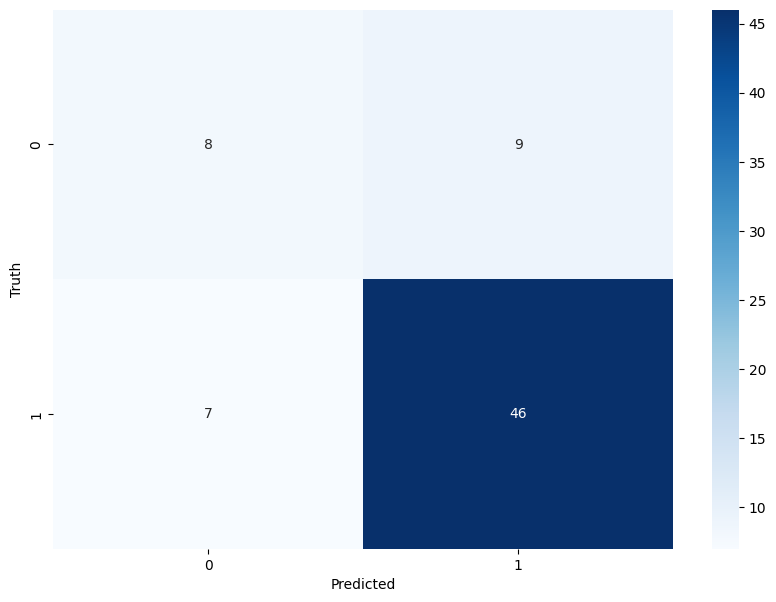

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix
cm = confusion_matrix(y, y_hat)

plt.figure(figsize=(10,7))

# Using seaborn to plot heatmap, annot=True to annotate the numbers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [25]:
from sklearn.metrics import accuracy_score
# Calculate Accuracy
acc = accuracy_score(y, y_hat)

print(f"Accuracy: {acc:.03f}")

Accuracy: 0.771


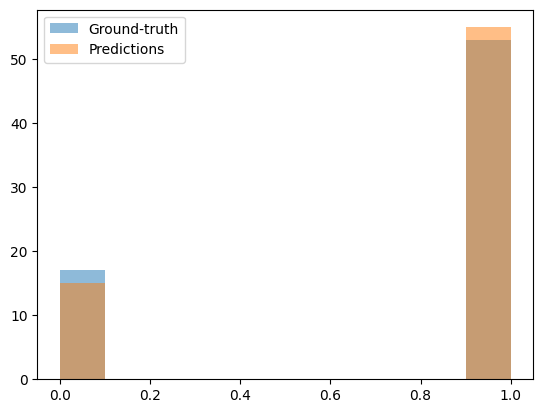

In [26]:
plt.hist(y, label='Ground-truth', alpha=0.5)
plt.hist(y_hat, label='Predictions', alpha=0.5)
plt.legend()